# packages for spatial analysis with: ![python](./images/python.png) ![anaconda](./images/anaconda.png)
[Download Anaconda](https://www.continuum.io/downloads)
![git](./images/git.png)
https://git-scm.com/downloads

### **To create the virtual environment, start with the following command:**

#  C:\\> conda create -n envName jupyter geopandas folium

In [ ]:
# talk about gi clone vs. git fork
# add arcpy difference
# talk about windows command prompt git
# addition of vim

# QA LakeCat Dataset

The following code walk through the process of finding local lake basins with the on-network accumulation process. For each lake, we report the "catchment" statistics as a landscape summarization of the NHD Catchments associated by flowlines that hold the waterbodies COMID in the "WBAREACOMI" field. Using geopandas, we can do a unary_union with these catchments and compare the overlapping areas using the 'difference' method built in to geopandas. This script selects polys where we find less than 50% of the lake is covered by it's associated catchments and plots them with the folium package for a slippy map of each of the instances of poor coverage.

In [2]:
from StreamCat_functions import findUpstreamNpy

![LakeCat](./images/linked.png)

_**LakeCat** sumarizes landscape metrics for **NHDWaterBody** watersheds. In order to report an accurate local basin for each, an array of **NHDCatchments** are accumlated in cases where more than one needed to cover the waterbody polygon_

_**NHDFlowlines** hold WBAREACOMI attribute that links flowlines to lakes.  We map those to catchments and come up with the local_ 'catchment' _basin, described in the 'Cat' statistics in LakeCat. This is a hybridized version of what the individual catchment is, the basin needs to cover the geometry of the water feature that it is describing_

In [8]:
#import os
import numpy as np
#import sys
import geopandas as gpd
#sys.path.append('/home/rick/projects/SDMG')
from StreamCat_functions import findUpstreamNpy

numpy_dir = '/media/rick/600ABCCF0ABCA386/Users/rick/Documents/SDMG_Lakes/On_Net_Npy_files/children'
zone = '03W'
comids = np.load(numpy_dir + '/comids' + zone + '.npy')

lakes = gpd.GeoDataFrame.from_file('/media/rick/gitSum/NHDv21/NHDPlusSA/NHDPlus03W/NHDSnapshot/Hydrography/NHDWaterbody.shp')


In [1]:
import os
os.getcwd()

'C:\\Users\\Rdebbout\\Plot2Shps\\SDMG'

In [1]:
% matplotlib inline
import geopandas as gpd

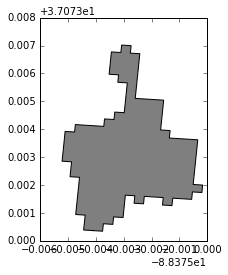

In [22]:
basin = gpd.GeoDataFrame.from_file("basin.shp")
basin.plot(column='FEATUREID', cmap="gist_earth")

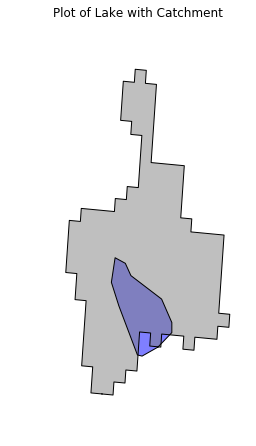

In [26]:
import matplotlib.pyplot as plt
#plt.style.use("default")
fig, ax = plt.subplots(1, figsize=(3.5,7))
base = lake.plot(ax=ax, color='blue')
basin.plot(ax=base, color='grey') 
ax.axis('off')
ax.set_title("Plot of Lake with Catchment")

In [27]:
?gpd.GeoDataFrame.plot

In [15]:
basin.head()

,AreaSqKM,FEATUREID,GRIDCODE,SOURCEFC,geometry
0,0.1548,1861984,2824262,NHDFlowline,POLYGON ((-88.37909406266083 37.07336524302247...


'''TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -83.55969418159917 36.3934340772607 at -83.55969418159917 36.3934340772607
Traceback (most recent call last):

  File "<ipython-input-191-382f35277760>", line 6, in <module>
    diffgeom = lake['geometry'].difference(basin.unary_union.buffer(0))

  File "C:\Users\Rdebbout\AppData\Local\Continuum\Anaconda2\envs\epa\lib\site-packages\geopandas\base.py", line 192, in unary_union
    return unary_union(self.geometry.values)

  File "C:\Users\Rdebbout\AppData\Local\Continuum\Anaconda2\envs\epa\lib\site-packages\shapely\ops.py", line 148, in unary_union
    return geom_factory(lgeos.methods['unary_union'](collection))

  File "C:\Users\Rdebbout\AppData\Local\Continuum\Anaconda2\envs\epa\lib\site-packages\shapely\geometry\base.py", line 65, in geom_factory
    raise ValueError("No Shapely geometry can be created from null value")

ValueError: No Shapely geometry can be created from null value'''

# Querying attributes

In [45]:
lakes.loc?
lakes.loc[lakes['COMID'] == 936010061]
lakes.ix[lakes.COMID == 936010061]
lakes.ix[lakes.COMID.isin([936010061])]
lakes.query("COMID == 936010061")

,AREASQKM,COMID,ELEVATION,FCODE,FDATE,FTYPE,GNIS_ID,GNIS_NAME,REACHCODE,RESOLUTION,SHAPE_AREA,SHAPE_LENG,VPU,geometry
53263,78.247,936010061,389.0,39009,2009-04-02,LakePond,None,None,06010204008777,Medium,0.007782,5.634971,06,POLYGON Z ((-84.25051737966635 35.779711611129...


In [58]:
import sys
import pandas as pd
sys.path.append('D:/Projects/StreamCat')
from StreamCat_functions import findUpstreamNpy, makeVPUdict

NHD_dir = 'D:/NHDPlusV21'
inputs = makeVPUdict(NHD_dir)
zone = '17'
hr = inputs[zone]
lakes = lksnet.ix[lksnet.VPU == zone]  
cats = gpd.GeoDataFrame.from_file('%s/NHDPlus%s/NHDPlus%s/NHDPlusCatchment/Catchment.shp' % (NHD_dir,hr, zone))   
lookup = pd.read_csv('D:/Projects/lakesAnalysis/On_Network_LakeCOMs/LakeCOMs%s.csv' % zone)

In [59]:
lks = gpd.GeoDataFrame()
bsn = gpd.GeoDataFrame()
miss = gpd.GeoDataFrame()

for idx, row in lookup.iterrows():
    lake = lakes.ix[lakes.COMID == row.wbCOMID]
    catbas = findUpstreamNpy(zone, int(row.catCOMID), catnumps)
    basin = cats.ix[cats.FEATUREID.isin(catbas)]
    try: 
        diffgeom = lake['geometry'].difference(basin.unary_union.buffer(0))
        pct = diffgeom.area / lake.area * 100
        if pct.values[0] > 50:
            lks = pd.concat([lks, lake])
            bsn = pd.concat([bsn, basin])
            miss = pd.concat([miss, gpd.GeoDataFrame(geometry=diffgeom)])
    except:
        print row.wbCOMID
        continue

TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -115.29754750037107 48.494238237055328 at -115.29754750037107 48.494238237055328


22886855.0


TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -113.89630804569528 48.294582836107509 at -113.89630804569528 48.294582836107509


22971534.0


TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -118.07544650636063 47.240948484611607 at -118.07544650636063 47.240948484611607


23466505.0


TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -112.14484920303542 43.385591732656884 0 at -112.14484920303542 43.385591732656884 0
Ring Self-intersection at or near point -112.14484920303542 43.385591732656884 0


24566837.0


TopologyException: found non-noded intersection between LINESTRING (-116.943 44.784, -116.943 44.7842) and LINESTRING (-116.943 44.7843, -116.943 44.7842) at -116.94288496198675 44.784166977543826 0


120054057.0


In [61]:
lks.to_crs({'init' :'epsg:4326'}).to_file(r"C:\Users\Rdebbout\Plot2Shps\lks.json",driver="GeoJSON")
bsn.to_crs({'init' :'epsg:4326'}).to_file(r"C:\Users\Rdebbout\Plot2Shps\bsn.json",driver="GeoJSON")
miss.to_crs({'init' :'epsg:4326'}).to_file(r"C:\Users\Rdebbout\Plot2Shps\miss.json",driver="GeoJSON")

In [66]:
center_point = lakes.unary_union.buffer(0).centroid
print center_point.x
print center_point.y

-117.473402978
45.9604085477


In [95]:
import folium
map=folium.Map(location=[45.96040854768601, -117.47340297823],zoom_start=6,tiles="Stamen Terrain")
fg=folium.FeatureGroup(name="Lake Points")
for lat,lon,name in zip(lks['geometry'].centroid.map(lambda p: p.y),lks['geometry'].centroid.map(lambda p: p.x),lks['COMID']):
        fg.add_child(folium.Marker(location=[lat,lon],popup=name.map(lambda x: "NHD Waterbody COMID: %s" % x),
                                   icon=folium.Icon(icon_color='black')))
map.add_child(fg)
map.add_child(folium.GeoJson(data=open(r'C:\Users\Rdebbout\Plot2Shps\lks.json'),
                name='NHD Lake',
                style_function=lambda x: {'fillColor':'blue', 'fill_opacity': 0.2, 'color':'black'}))
map.add_child(folium.GeoJson(data=open(r'C:\Users\Rdebbout\Plot2Shps\bsn.json'),
                name='Catchment Basin',
                style_function=lambda x: {'fillColor':'grey', 
                          'fill_opacity': 0.47,}))
map.add_child(folium.GeoJson(data=open(r'C:\Users\Rdebbout\Plot2Shps\miss.json'),
                name='Missed Area',
                style_function=lambda x: {'fillColor':'red', 'fill_opacity': 0.2, 'color':'none'}))
map.add_child(folium.LayerControl())
map.save(outfile=r'C:\Users\Rdebbout\Plot2Shps\lakesPoint.html')

In [88]:
for lat,lon,name in zip(lks['geometry'].centroid.map(lambda p: p.y),lks['geometry'].centroid.map(lambda p: p.x),lks['COMID']):
    print "Lat: {} \nLon: {} \nCOMID: {}".format(lat,lon,name)

Lat: 48.9586739639 
Lon: -115.968621199 
COMID: 22902910
Lat: 48.6921599653 
Lon: -116.243963678 
COMID: 22908317
Lat: 47.2077477455 
Lon: -113.177224942 
COMID: 22926742
Lat: 47.6728067469 
Lon: -113.479367102 
COMID: 22971734
Lat: 47.5241780253 
Lon: -115.16709696 
COMID: 22984000
Lat: 48.7406921866 
Lon: -118.167167349 
COMID: 23044053
Lat: 48.1775633809 
Lon: -120.587980031 
COMID: 23078055
Lat: 44.0589838741 
Lon: -110.717825411 
COMID: 23127353
Lat: 43.7857736839 
Lon: -110.533750997 
COMID: 23127941
Lat: 43.7184108775 
Lon: -110.375800271 
COMID: 23128057
Lat: 43.0051297178 
Lon: -111.435738907 
COMID: 23153152
Lat: 43.9363978979 
Lon: -114.253001309 
COMID: 23246636
Lat: 43.2769175259 
Lon: -118.370532097 
COMID: 23422815
Lat: 44.4521967947 
Lon: -115.151039667 
COMID: 23526935
Lat: 45.9917004572 
Lon: -114.497699981 
COMID: 23577706
Lat: 43.701061859 
Lon: -122.848986372 
COMID: 23761350
Lat: 44.6546036418 
Lon: -123.069539666 
COMID: 23768905
Lat: 45.1430904923 
Lon: -123.971

In [ ]:
lks2 = gpd.GeoDataFrame()
bsn2 = gpd.GeoDataFrame()
miss2 = gpd.GeoDataFrame()
for zone in inputs:
    hr = inputs[zone]
    lakes = lksnet.ix[lksnet.VPU == zone]  
    cats = gpd.GeoDataFrame.from_file('%s/NHDPlus%s/NHDPlus%s/NHDPlusCatchment/Catchment.shp' % (NHD_dir,hr, zone))   
    lookup = pd.read_csv('D:/Projects/lakesAnalysis/On_Network_LakeCOMs/LakeCOMs%s.csv' % zone)
    for idx, row in lookup.iterrows():
        lake = lakes.ix[lakes.COMID == row.wbCOMID]
        catbas = findUpstreamNpy(zone, int(row.catCOMID), catnumps)
        basin = cats.ix[cats.FEATUREID.isin(catbas)]
        try: 
            diffgeom = lake['geometry'].difference(basin.unary_union.buffer(0))
            pct = diffgeom.area / lake.area * 100
            if pct.values[0] > 50:
                lks2 = pd.concat([lks2, lake])
                bsn2 = pd.concat([bsn2, basin])
                miss2 = pd.concat([miss2, gpd.GeoDataFrame(geometry=diffgeom)])
        except:
            print row.wbCOMID
            continue

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -83.55969418159917 36.3934340772607 at -83.55969418159917 36.3934340772607


166997561.0


TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -87.994943579174645 35.55474577981515 at -87.994943579174645 35.55474577981515


166997626.0


TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -87.000008908731957 34.655031279541845 0 at -87.000008908731957 34.655031279541845 0
Ring Self-intersection at or near point -87.000008908731957 34.655031279541845 0


167679168.0


TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -78.901113106478107 42.044401875176824 at -78.901113106478107 42.044401875176824


166899002.0


TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -87.801996707487049 36.500066276677906 0 at -87.801996707487049 36.500066276677906 0
Ring Self-intersection at or near point -87.801996707487049 36.500066276677906 0


166899385.0


TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -100.39077073406148 45.637766897131328 at -100.39077073406148 45.637766897131328


19251179.0


TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -106.54486286717204 47.962023152628809 at -106.54486286717204 47.962023152628809


167204901.0


TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -110.20390270079844 44.317719183373754 at -110.20390270079844 44.317719183373754


167204959.0


TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -97.565794871213669 42.163466175979259 at -97.565794871213669 42.163466175979259


17272914.0


TopologyException: found non-noded intersection between LINESTRING (-92.7611 38.1681, -92.7611 38.168) and LINESTRING (-92.7611 38.1682, -92.7611 38.168) at -92.761129365213634 38.16801109237479 0


167267897.0


TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -93.599349445549052 44.893190940458297 at -93.599349445549052 44.893190940458297


1101734.0


TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -96.243419005938449 44.307855983194045 at -96.243419005938449 44.307855983194045


4136984.0


TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -94.053411715512482 46.774396591400695 at -94.053411715512482 46.774396591400695


4619930.0


TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -94.119706673658442 46.700544427372812 at -94.119706673658442 46.700544427372812


4620258.0


TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -88.610291481318157 42.612015972435607 at -88.610291481318157 42.612015972435607


13294928.0


TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -89.431868882959918 45.913080814707222 at -89.431868882959918 45.913080814707222


13393637.0


TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -89.522981124537125 45.840277540727634 at -89.522981124537125 45.840277540727634


13393923.0


TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -89.284068821062448 45.636671683391718 at -89.284068821062448 45.636671683391718


13395039.0


TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -89.472735087071158 39.203630472813536 at -89.472735087071158 39.203630472813536


13880948.0


TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -89.721947831187606 44.742692908642169 at -89.721947831187606 44.742692908642169


14731996.0


TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -91.070592349322581 41.172235701778462 at -91.070592349322581 41.172235701778462


14806577.0


TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -94.715594531744642 47.575712351720171 at -94.715594531744642 47.575712351720171


22322013.0


TopologyException: found non-noded intersection between LINESTRING (-91.6899 39.4545, -91.6897 39.4547) and LINESTRING (-91.6897 39.4545, -91.6897 39.4547) at -91.689693139948901 39.454705003754547 0


937110111.0


In [ ]:
% timeit
lks2.to_crs({'init' :'epsg:4326'}).to_file(r"C:\Users\Rdebbout\Plot2Shps\lks3.json",driver="GeoJSON")
bsn2.to_crs({'init' :'epsg:4326'}).to_file(r"C:\Users\Rdebbout\Plot2Shps\bsn3.json",driver="GeoJSON")
miss2.to_crs({'init' :'epsg:4326'}).to_file(r"C:\Users\Rdebbout\Plot2Shps\miss3.json",driver="GeoJSON")

In [ ]:
map=folium.Map(location=[45.96040854768601, -117.47340297823],zoom_start=6,tiles="Stamen Terrain")

fg=folium.FeatureGroup(name="Lake Points")
for lat,lon,name in zip(lakes['geometry'].centroid.map(lambda p: p.y),lakes['geometry'].centroid.map(lambda p: p.x),lakes['COMID']):
        fg.add_child(folium.Marker(location=[lat,lon],popup='NHD Waterbody COMID: %s' % name,
                                   icon=folium.Icon(icon_color='white', prefix='fa',icon='warning')))
map.add_child(fg)

map.add_child(folium.GeoJson(data=open(r'C:\Users\Rdebbout\Plot2Shps\lks.json'),
name='NHD Lake',
style_function=lambda x: {'fillColor':'blue', 'fill_opacity': 0.4, 'color':'#5bc0de'}
))
map.add_child(folium.GeoJson(data=open(r'C:\Users\Rdebbout\Plot2Shps\bsn.json'),
name='Catchment Basin',
style_function=lambda x: {'fillColor':'grey', 
                          'fill_opacity': 0.3, 
                          'color':'white'}
))
map.add_child(folium.GeoJson(data=open(r'C:\Users\Rdebbout\Plot2Shps\miss.json'),
name='Missed Area',
style_function=lambda x: {'fillColor':'red', 'fill_opacity': 0.2, 'color':'none'}
))
map.add_child(folium.LayerControl())
map.save(outfile=r'C:\Users\Rdebbout\Plot2Shps\lakesPoint.html')

In [ ]:
def color(vpu):
    if vpu in ['09','16','08','03N']:
        col='#d9534f'
    elif vpu in ['10U','05','13','03S']:
        col='#f9f9f9'
    elif vpu in ['14','07','02','12']:
        col='#5bc0de'
    elif vpu in ['17','10L','04','06','15']:
        col='#5cb85c'
    elif vpu in ['18','11','01','03W']:
        col='#428bca'
    return col

In [ ]:
extent = lks2.unary_union.bounds
lat_Center = (extent[1] + extent[3]) / 2
lon_Center = (extent[0] + extent[2]) / 2

In [ ]:
http://fontawesome.io/icons/
http://glyphicons.bootstrapcheatsheets.com/